In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Load the MNIST library which is part of Keras.  MNIST stands for Modified National Institute of Technology. https://en.wikipedia.org/wiki/MNIST_database. It is a collection of 60,000 training and 10,000 test images of the digits 0-9. https://keras.io/datasets/. Previously we gained about 98% accuracy in the model.  This time we will introduce convolutional neural networks (convets, or CNN) and see if we can improve the model. 

In [2]:
from keras.datasets import cifar100
from keras import backend
from keras import models
from keras import layers
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data(label_mode='fine')

In [4]:
train_images =  train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32')/test_images.max()

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

Train on 50000 samples, validate on 12500 samples
Epoch 1/50
50000/50000 [==============================] - 436s 9ms/step - loss: 4.1449 - acc: 0.0780 - val_loss: 4.2148 - val_acc: 0.0961
Epoch 2/50
50000/50000 [==============================] - 428s 9ms/step - loss: 3.4185 - acc: 0.1850 - val_loss: 3.2005 - val_acc: 0.2285
Epoch 3/50
50000/50000 [==============================] - 428s 9ms/step - loss: 3.0089 - acc: 0.2601 - val_loss: 2.6977 - val_acc: 0.3210
Epoch 4/50
50000/50000 [==============================] - 429s 9ms/step - loss: 2.7101 - acc: 0.3256 - val_loss: 2.8172 - val_acc: 0.3256
Epoch 5/50
50000/50000 [==============================] - 429s 9ms/step - loss: 2.4801 - acc: 0.3696 - val_loss: 3.1254 - val_acc: 0.2894
Epoch 6/50
50000/50000 [==============================] - 439s 9ms/step - loss: 2.3032 - acc: 0.4094 - val_loss: 2.3420 - val_acc: 0.4148
Epoch 7/50
50000/50000 [==============================] - 367s 7ms/step - loss: 2.1739 - acc: 0.4398 - val_loss: 2.1692 - 

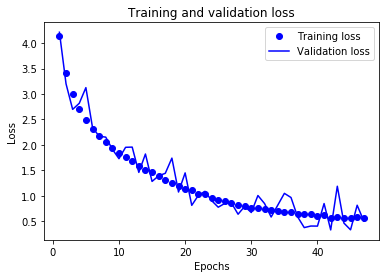

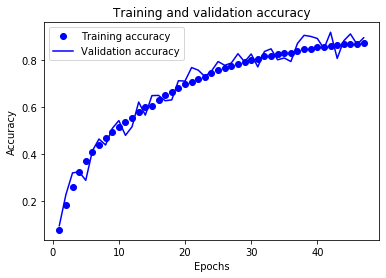

10000/10000 [==============================] - 34s 3ms/step
test_acc: 0.4784


In [43]:
backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
#model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3,3), activation = 'relu', padding='same'))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(512, (3,3), activation = 'relu', padding='same'))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(train_images, 
          train_labels, 
          epochs = 50, 
          batch_size = 64,  
          validation_data=(x_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_acc', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 10s 962us/step
test_acc: 0.4784
